## Lab for K-Means clustering

#### Motivation
In this lab, you will apply K-Means clustering to an unlabeled dataset derived from the Breast Cancer Wisconsin Diagnostic dataset. This lab focuses on using clustering to group data points and evaluate the effectiveness of the clusters.

#### By completing the steps, you will:

* Prepare the dataset for clustering.
* Determine the optimal number of clusters using the Elbow Method.
* Perform K-Means clustering and evaluate its quality using the Silhouette Score.
* Visualize clusters using Principal Component Analysis (PCA).
* Compare predicted clusters to actual labels to assess model effectiveness.

### Step 0: Load and Prepare the Dataset (Provided)

The code for this step is already given to you. It performs the following:

* Imports necessary libraries such as pandas, numpy, matplotlib, seaborn, sklearn.cluster.KMeans, and others.
* Loads the Breast Cancer dataset from sklearn.datasets.load_breast_cancer().
* Creates a DataFrame containing the features.
* Removes the labels from the dataset, as clustering is an unsupervised learning task.


No modifications are needed for this step.

In [1]:
# CodeGrade step0

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer


In [ ]:
# CodeGrade step0

# Load dataset
cancer = load_breast_cancer()

df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

# Remove labels (unsupervised learning)
df_unlabeled = df.copy()
print(df_unlabeled)


     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

### Step 1: Rescale the Data
Objective: Standardize the dataset before applying K-Means.

Instructions
* Use StandardScaler from sklearn.preprocessing to normalize all features.
* Fit the scaler to the dataset and transform it into a new variable called df_scaled.
* Ensure that df_scaled retains the same shape as the original data.

In [39]:
# CodeGrade step1

# Rescale
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_unlabeled)

# Shape
print(df_scaled.shape)

if df_scaled.shape == df_unlabeled.shape:
    print("df_scaled has the same shape as df_unlabeled")
else:
    print("df_scaled does not have the same shape as df_unlabeled")

(569, 30)
df_scaled has the same shape as df_unlabeled


scaled data has the same shaped as original data

### Step 2: Determine the Optimal Number of Clusters (Elbow Method)

Objective: Use the Elbow Method to identify the best value for K.

Instructions
* Initialize an empty list wcss (Within-Cluster Sum of Squares).
* Loop over values of K from 1 to 9:
  * Train a KMeans model with the current k, random_state=42, and n_init=10.
  * Fit the model to df_scaled and store the inertia (WCSS) in wcss.
* Calculate and return the mean WCSS.


In [ ]:
# CodeGrade step2

# WCSS, within cluster sum of squares
# evaluates how well data points in a cluster are grouped together

wcss = []

# for loop, find WCSS for different k # of clusters
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, random_state= 42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Mean of WCSS
mean_wcss = np.mean(wcss)
print(f"Mean WCSS: {mean_wcss}")

c:\Users\jtlee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\jtlee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\jtlee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\jtlee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

Mean WCSS: 9571.945762124911


c:\Users\jtlee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\jtlee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\jtlee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Plot the Elbow Method graph:
* X-axis: Number of clusters (K).
* Y-axis: WCSS values.
* Use markers ('o') and a line ('-').

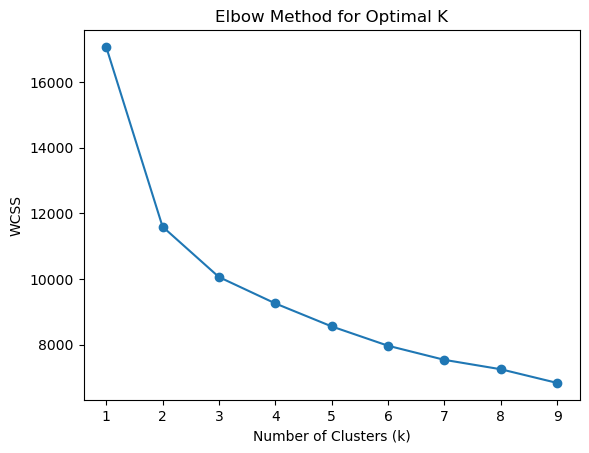

In [17]:
# Plot Elbow Method
plt.figure()
plt.plot(range(1, 10), wcss, marker = 'o', linestyle = '-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()


The elbow point where the drop in WCSS levels off is around 2-3, which are candidates for the best k number of clusters.

### Step 3: Perform K-Means Clustering

Objective: Apply K-Means clustering using the best K from the Elbow Method.

Instructions
* Set optimal_k (determined from the previous step).
* Train a KMeans model with optimal_k, random_state=42, and n_init=10.
* Assign cluster labels to df_unlabeled["Cluster"].
* Compute the Silhouette Score to measure clustering quality.
* Return the Silhouette Score rounded to 4 decimal places.


In [22]:
# CodeGrade step3

# Optimal k
optimal_k = 2
kmeans = KMeans(n_clusters = optimal_k, random_state=42, n_init=10)
df_unlabeled["Cluster"] = kmeans.fit_predict(df_scaled)

# Silhouette Average
silhouette_avg = silhouette_score(df_scaled, df_unlabeled['Cluster'])

# Round
print(f"Silhouette Score: {round(silhouette_avg, 4)}")

Silhouette Score: 0.3434


c:\Users\jtlee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


silhouette score of 0.3434 means clusters are moderately well separated but not ideal

### Step 4: Visualize Clusters with PCA
Objective: Reduce dimensions and visualize the clusters.

Instructions
* Apply PCA (Principal Component Analysis) to reduce df_scaled to two dimensions (n_components=2).
* Store the transformed dataset in df_pca.
* Return the maximum absolute value in df_pca, rounded to 0 decimal places.

In [44]:
# CodeGrade step4

# PCA to reduce dimensions
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Get a DataFrame of loadings
loadings = pd.DataFrame(
    pca.components_,
    columns=df.columns,  # original features
    index=['PC1', 'PC2']
)
print(loadings)

# Max pca
max_abs_pca = np.abs(df_pca).max()
print(max_abs_pca)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
PC1     0.218902      0.103725        0.227537   0.220995         0.142590   
PC2    -0.233857     -0.059706       -0.215181  -0.231077         0.186113   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
PC1          0.239285        0.258400             0.260854       0.138167   
PC2          0.151892        0.060165            -0.034768       0.190349   

     mean fractal dimension  ...  worst radius  worst texture  \
PC1                0.064363  ...      0.227997       0.104469   
PC2                0.366575  ...     -0.219866      -0.045467   

     worst perimeter  worst area  worst smoothness  worst compactness  \
PC1         0.236640    0.224871          0.127953           0.210096   
PC2        -0.199878   -0.219352          0.172304           0.143593   

     worst concavity  worst concave points  worst symmetry  \
PC1         0.228768              0.250886        0.122

Create a scatter plot of the two PCA components:
* X-axis: Principal Component 1.
* Y-axis: Principal Component 2.
* Color the points based on their assigned cluster.
* Use cmap='viridis', marker 'o', and edgecolor='k'.
* Add a color bar for cluster labels.

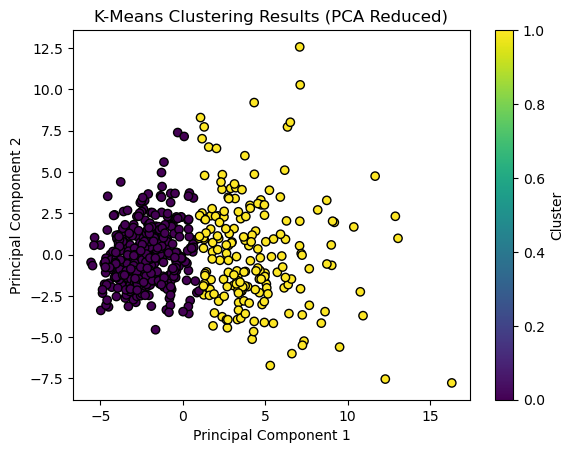

In [31]:
# Scatter plot
plt.figure()
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_unlabeled['Cluster'], cmap='viridis', marker='o', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Results (PCA Reduced)')
plt.colorbar(label='Cluster')
plt.show()

### Step 5: Compare Clusters to Actual Labels
Objective: Compare predicted clusters to the actual class labels.

Instructions
* Create a new column in df called "Predicted_Cluster" and assign it the cluster labels.
* Add a column "Actual_Label" using cancer.target, where:
  * 0 = Malignant
  * 1 = Benign
* Print the value counts of the unique combinations of "Actual_Label" and "Predicted_Cluster", returning its shape.

In [36]:
# CodeGrade step5

# Clusters

df["Predicted_Cluster"] = df_unlabeled['Cluster']
df["Actual_Label"] = cancer.target
df['Actual_Label'] = df['Actual_Label'].map({0: 'Malignant', 1: 'Benign'})

# Return cluster comparison
# Count combinations of Actual_Label and Predicted_Cluster
counts = df.value_counts(subset=['Actual_Label', 'Predicted_Cluster'])

# Print the counts
print(counts)

# Print the shape (number of unique combinations)
print("Shape:", counts.shape)

Actual_Label  Predicted_Cluster
Benign        0                    339
Malignant     1                    176
              0                     36
Benign        1                     18
Name: count, dtype: int64
Shape: (4,)


Predicted cluster 0 has 339 instances of benign tumors, and 36 malignant (misclassified).
Predicted cluster 1 has 176 instances of malignant tumors, and 18 benign (misclassified).

